# Text Analytics

## Setting Pyspark in Colab

In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.2.4/spark-3.2.4-bin-hadoop3.2.tgz
!tar xf spark-3.2.4-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import findspark
findspark.init("/content/spark-3.2.4-bin-hadoop3.2")

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
gpath = '/gdrive/MyDrive/data/'

---
## **Preprocessing**

### tokenize, stemming, pos tagging

#### en

In [ ]:
import nltk

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import gutenberg

files_en = gutenberg.fileids()
doc_en = gutenberg.open('austen-emma.txt').read()

In [ ]:
files_en[:5]

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt']

In [ ]:
doc_en

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister\'s marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse\'s family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice o

#### ko

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.6 MB/s 
     |████████████████████████████████| 448 kB 9.8 MB/s 


In [ ]:
import konlpy

In [ ]:
from konlpy.corpus import kobill

files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [ ]:
files_ko

['1809898.txt',
 '1809891.txt',
 '1809899.txt',
 '1809890.txt',
 '1809894.txt',
 '1809893.txt',
 '1809896.txt',
 '1809895.txt',
 '1809897.txt',
 '1809892.txt']

In [ ]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

#### en

In [ ]:
sentences_en = nltk.tokenize.sent_tokenize(doc_en)

In [ ]:
tokens_en = [nltk.tokenize.word_tokenize(s) for s in sentences_en]

In [ ]:
len(tokens_en)

7493

In [ ]:
tokens_en[1]

#### ko

In [ ]:
from konlpy.tag import Okt
okt = Okt()
tokens_ko = okt.morphs(doc_ko)

In [ ]:
tokens_ko[0:100]

#### en

In [ ]:
# tokens_en 에 자료가 입력되어 있다
tokens = []
for s in tokens_en:
    for token in s:
        tokens.append(token.lower())

In [ ]:
tokens[:10]

['[', 'emma', 'by', 'jane', 'austen', '1816', ']', 'volume', 'i', 'chapter']

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')+ [
    '.', ',', '--', '\'s', '?', '!', ')', '(', ':', '\'', '[', ']',
    '\'re', '"', '-', '}', '{', u'—', 'rt', 'http', 't', 'co', '@', '#',
    ]

In [ ]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

stemmed = []
for token in tokens:
    if token == '' or token in stop_words:
        continue
    stemmed.append(stemmer.stem(token))

In [ ]:
stemmed[:10]

['emma',
 'jane',
 'austen',
 '1816',
 'volum',
 'chapter',
 'emma',
 'woodhous',
 'handsom',
 'clever']

In [ ]:
tokens = "The little yellow dog barked at the Persian cat".split()
tags_en = nltk.pos_tag(tokens)

In [ ]:
tags_en

[('The', 'DT'),
 ('little', 'JJ'),
 ('yellow', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('Persian', 'JJ'),
 ('cat', 'NN')]

#### ko

In [ ]:
#from konlpy.tag import Okt
#okt = Okt()
tags_ko = okt.pos("작고 노란 강아지가 페르시안 고양이에게 짖었다")

In [ ]:
tags_ko

[('작고', 'Noun'),
 ('노란', 'Adjective'),
 ('강아지', 'Noun'),
 ('가', 'Josa'),
 ('페르시안', 'Noun'),
 ('고양이', 'Noun'),
 ('에게', 'Josa'),
 ('짖었다', 'Verb')]

In [ ]:
okt.morphs("작고 노란 강아지가 페르시안 고양이에게 짖었다")

['작고', '노란', '강아지', '가', '페르시안', '고양이', '에게', '짖었다']

### nltk tokenizer를 이용하여 tfidf 만들기 예제

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
docs = ['A rose is a rose is a rose is a rose.',
        'Oh, what a fine day it is.',
        "A day ain't over till it's truly over."]

In [ ]:
count_vectorizer = CountVectorizer(min_df=1, tokenizer=nltk.word_tokenize)

In [ ]:
docs_features = count_vectorizer.fit_transform(docs)

In [ ]:
print(count_vectorizer.vocabulary_)
print(count_vectorizer.vocabulary_.get('what'))

{'a': 3, 'rose': 12, 'is': 7, '.': 2, 'oh': 10, ',': 1, 'what': 15, 'fine': 6, 'day': 5, 'it': 8, 'ai': 4, "n't": 9, 'over': 11, 'till': 13, "'s": 0, 'truly': 14}
15


In [ ]:
docs_features.shape

(3, 16)

In [ ]:
docs_features.toarray()

array([[0, 0, 1, 4, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0]])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()

tfidf_features = transformer.fit_transform(docs_features)

In [ ]:
tfidf_features.toarray()

array([[0.        , 0.        , 0.11337964, 0.45351858, 0.        ,
        0.        , 0.        , 0.4379908 , 0.        , 0.        ,
        0.        , 0.        , 0.7678737 , 0.        , 0.        ,
        0.        ],
       [0.        , 0.39427404, 0.2328646 , 0.2328646 , 0.        ,
        0.29985557, 0.39427404, 0.29985557, 0.29985557, 0.        ,
        0.39427404, 0.        , 0.        , 0.        , 0.        ,
        0.39427404],
       [0.30352608, 0.        , 0.17926739, 0.17926739, 0.30352608,
        0.23083941, 0.        , 0.        , 0.23083941, 0.30352608,
        0.        , 0.60705216, 0.        , 0.30352608, 0.30352608,
        0.        ]])

## **transform sentences to vectors**


### scikit-learn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]
vectorizer = CountVectorizer(stop_words=['is', 'the'])
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())
print(vectorizer.get_stop_words())
print("transform:", vectorizer.transform(['I did not see the third document']).toarray())

print(X.toarray())

['and', 'document', 'first', 'one', 'second', 'third', 'this']
frozenset({'the', 'is'})
transform: [[0 1 0 0 0 1 0]]
[[0 1 1 0 0 0 1]
 [0 2 0 0 1 0 1]
 [1 0 0 1 0 1 1]
 [0 1 1 0 0 0 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Spark

In [ ]:
from pyspark.ml.feature import CountVectorizer

df = spark.createDataFrame(
   [(0, ["I", "love", "a", "red", "apple"]),
    (1, ["apple", "is", "juicy"]),
    (2, ["I", "love", "you", "I", "am"])],
   ["label", "raw"])

cv = CountVectorizer(inputCol="raw", outputCol="vectors")
model = cv.fit(df)
df = model.transform(df)

df.show(truncate=False)

+-----+------------------------+-------------------------------------+
|label|raw                     |vectors                              |
+-----+------------------------+-------------------------------------+
|0    |[I, love, a, red, apple]|(9,[0,1,2,4,5],[1.0,1.0,1.0,1.0,1.0])|
|1    |[apple, is, juicy]      |(9,[2,7,8],[1.0,1.0,1.0])            |
|2    |[I, love, you, I, am]   |(9,[0,1,3,6],[2.0,1.0,1.0,1.0])      |
+-----+------------------------+-------------------------------------+



In [ ]:
print(model.vocabulary)

id2tok = {el:i for i,el in enumerate(model.vocabulary)}
print(id2tok)

['I', 'love', 'apple', 'you', 'red', 'a', 'am', 'juicy', 'is']
{'I': 0, 'love': 1, 'apple': 2, 'you': 3, 'red': 4, 'a': 5, 'am': 6, 'juicy': 7, 'is': 8}


## **TF-IDF**

#### optional  
강의자료에 있는 내용을 코드로 돌려보면서 확인해보는 부분입니다.

In [ ]:
#optional
corpus = {
 'a' : "Mr. Green killed Colonel Mustard in the study with the candlestick. \
Mr. Green is not a very nice fellow.",
 'b' : "Professor Plum has a green plant in his study.",
 'c' : "Miss Scarlett watered Professor Plum's green plant while he was away \
from his office last week."
}

terms = {
 'a' : [ i.lower() for i in corpus['a'].split() ],
 'b' : [ i.lower() for i in corpus['b'].split() ],
 'c' : [ i.lower() for i in corpus['c'].split() ]
}

In [ ]:
#optional
terms = spark.createDataFrame(
   [(i, terms[i]) for i in terms],
   ["document", "raw"])

cv = CountVectorizer(inputCol="raw", outputCol="vectors")
model = cv.fit(terms)

tf = model.transform(terms)
tf.show(truncate=False)

+--------+----------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------+
|document|raw                                                                                                                         |vectors                                                                                                            |
+--------+----------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------+
|a       |[mr., green, killed, colonel, mustard, in, the, study, with, the, candlestick., mr., green, is, not, a, very, nice, fellow.]|(34,[0,1,2,3,7,10,11,14,16,17,23,25,26,27,28,30],[2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0

In [ ]:
#optional
id2tok = {el:i for i,el in enumerate(model.vocabulary)}
print(id2tok)

{'green': 0, 'mr.': 1, 'in': 2, 'the': 3, 'professor': 4, 'plant': 5, 'his': 6, 'a': 7, 'plum': 8, 'away': 9, 'is': 10, 'with': 11, 'last': 12, 'scarlett': 13, 'colonel': 14, 'has': 15, 'mustard': 16, 'very': 17, "plum's": 18, 'office': 19, 'watered': 20, 'from': 21, 'week.': 22, 'candlestick.': 23, 'miss': 24, 'not': 25, 'killed': 26, 'fellow.': 27, 'study': 28, 'was': 29, 'nice': 30, 'he': 31, 'study.': 32, 'while': 33}


In [ ]:
#optional
pd_tf = tf.toPandas()
pd_tf['tf(mr.)'] = pd_tf.apply(lambda x: str(int(x['vectors'][id2tok['mr.']]))+"/"+str(len(x['raw'])), axis=1)
pd_tf['tf(green)'] = pd_tf.apply(lambda x: str(int(x['vectors'][id2tok['green']]))+"/"+str(len(x['raw'])), axis=1)
pd_tf['sum_1'] = pd_tf.apply(lambda x: \
                           str(int(x['vectors'][id2tok['mr.']]+x['vectors'][id2tok['green']]))+"/"+str(len(x['raw']))\
                           +" ("+str(round(int(x['vectors'][id2tok['mr.']]+x['vectors'][id2tok['green']])/len(x['raw']),2))+")"\
                           , axis=1)
pd_tf[['document', 'tf(mr.)', 'tf(green)', 'sum_1']]

,document,tf(mr.),tf(green),sum_1
0,a,2/19,2/19,4/19 (0.21)
1,b,0/9,1/9,1/9 (0.11)
2,c,0/16,1/16,1/16 (0.06)


In [ ]:
#optional
pd_tf['tf(the)'] = pd_tf.apply(lambda x: str(int(x['vectors'][id2tok['the']]))+"/"+str(len(x['raw'])), axis=1)
pd_tf['tf(plant)'] = pd_tf.apply(lambda x: str(int(x['vectors'][id2tok['plant']]))+"/"+str(len(x['raw'])), axis=1)
pd_tf['sum_2'] = pd_tf.apply(lambda x: \
                           str(int(x['vectors'][id2tok['the']]+x['vectors'][id2tok['green']]+x['vectors'][id2tok['plant']]))+"/"+str(len(x['raw']))\
                           +" ("+str(round(int(x['vectors'][id2tok['the']]+x['vectors'][id2tok['green']]+x['vectors'][id2tok['plant']])/len(x['raw']),2))+")"\
                           , axis=1)
pd_tf[['document', 'tf(the)', 'tf(green)', 'tf(plant)', 'sum_2']]

,document,tf(the),tf(green),tf(plant),sum_2
0,a,2/19,2/19,0/19,4/19 (0.21)
1,b,0/9,1/9,1/9,2/9 (0.22)
2,c,0/16,1/16,1/16,2/16 (0.12)


------

### scikit-learn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]

vectorizer = TfidfVectorizer(stop_words=['is', 'the'])
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())
print(X.toarray())

['and', 'document', 'first', 'one', 'second', 'third', 'this']
[[0.         0.55953044 0.69113141 0.         0.         0.
  0.4574528 ]
 [0.         0.74937693 0.         0.         0.58702189 0.
  0.30633237]
 [0.55280532 0.         0.         0.55280532 0.         0.55280532
  0.28847675]
 [0.         0.55953044 0.69113141 0.         0.         0.
  0.4574528 ]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import pandas as pd

print(vectorizer.get_feature_names_out())
df = pd.DataFrame(X.toarray())
df.head()

['and', 'document', 'first', 'one', 'second', 'third', 'this']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6
0,0.000000,0.559530,0.691131,0.000000,0.000000,0.000000,0.457453
1,0.000000,0.749377,0.000000,0.000000,0.587022,0.000000,0.306332
2,0.552805,0.000000,0.000000,0.552805,0.000000,0.552805,0.288477
3,0.000000,0.559530,0.691131,0.000000,0.000000,0.000000,0.457453


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

corpus = [
 "Mr. Green killed Colonel Mustard in the study with the candlestick. \
Mr. Green is not a very nice fellow.",
 "Professor Plum has a green plant in his study.",
 "Miss Scarlett watered Professor Plum's green plant while he was away \
from his office last week."
]

count_vectorizer = CountVectorizer(stop_words='english')
word_count_vector = count_vectorizer.fit_transform(corpus)

tfidf_transformer=TfidfTransformer()
X = tfidf_transformer.fit_transform(word_count_vector)

print(count_vectorizer.get_feature_names_out())
df=pd.DataFrame(X.toarray())
df.head()

['away', 'candlestick', 'colonel', 'fellow', 'green', 'killed', 'miss', 'mr', 'mustard', 'nice', 'office', 'plant', 'plum', 'professor', 'scarlett', 'study', 'watered', 'week']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000000,0.288992,0.288992,0.288992,0.341367,0.288992,0.000000,0.577984,0.288992,0.288992,0.000000,0.000000,0.000000,0.000000,0.000000,0.219786,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.361965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.466096,0.466096,0.466096,0.000000,0.466096,0.000000,0.000000
2,0.351711,0.000000,0.000000,0.000000,0.207726,0.000000,0.351711,0.000000,0.000000,0.000000,0.351711,0.267485,0.267485,0.267485,0.351711,0.000000,0.351711,0.351711


In [ ]:
import numpy
from sklearn.metrics.pairwise import cosine_similarity

query = ["Mr. Green"]
q = count_vectorizer.transform(query) # 중요함

print(q.toarray())
print(X[0].toarray())

print(numpy.inner(q.toarray(), X[0].toarray()))
print(numpy.inner(q.toarray(), X[1].toarray()))
print(numpy.inner(q.toarray(), X[2].toarray()))

[[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]]
[[0.         0.28899189 0.28899189 0.28899189 0.34136653 0.28899189
  0.         0.57798377 0.28899189 0.28899189 0.         0.
  0.         0.         0.         0.21978578 0.         0.        ]]
[[0.9193503]]
[[0.361965]]
[[0.20772628]]


### spark

In [ ]:
# Tokenizer
from pyspark.ml.feature import Tokenizer

sentenceData = spark."fill here"([
    (0.0, "Hi I heard about Spark"),
    (0.0, "I wish Java could use case classes"),
    (1.0, "Logistic regression models are neat")
], ["label", "sentence"])

tokenizer = "fill here"(inputCol="sentence", outputCol="words")
tokenizer."fill here"(sentenceData).show()

+-----+--------------------+--------------------+
|label|            sentence|               words|
+-----+--------------------+--------------------+
|  0.0|Hi I heard about ...|[hi, i, heard, ab...|
|  0.0|I wish Java could...|[i, wish, java, c...|
|  1.0|Logistic regressi...|[logistic, regres...|
+-----+--------------------+--------------------+



In [ ]:
# Tokenizer
from pyspark.ml.feature import RegexTokenizer

sentenceData = spark.createDataFrame([
    (0.0, "Hi I heard about Spark"),
    (0.0, "I wish Java could use case classes"),
    (1.0, "Logistic regression models are neat")
], ["label", "sentence"])

# 'c'글자를 기준으로 나눔
tokenizer = "fill here"(inputCol="sentence", outputCol="words", pattern='[c]')
tokenizer.transform(sentenceData).show(truncate=False)

+-----+-----------------------------------+---------------------------------------+
|label|sentence                           |words                                  |
+-----+-----------------------------------+---------------------------------------+
|0.0  |Hi I heard about Spark             |[hi i heard about spark]               |
|0.0  |I wish Java could use case classes |[i wish java , ould use , ase , lasses]|
|1.0  |Logistic regression models are neat|[logisti,  regression models are neat] |
+-----+-----------------------------------+---------------------------------------+



In [ ]:
from pyspark.ml.feature import Tokenizer
from pyspark.ml.feature import CountVectorizer

sentenceData = spark.createDataFrame([
    (0.0, "Hi I heard about Spark"),
    (0.0, "I wish Java could use case classes"),
    (1.0, "Logistic regression models are neat")
], ["label", "sentence"])

tokenizer = Tokenizer(inputCol="sentence", outputCol="words")
wordsData = tokenizer.transform(sentenceData)

cv = "fill here"(inputCol="words", outputCol="rawFeatures")
model = cv."fill here"(wordsData)
featurizedData = model."fill here"(wordsData)

In [ ]:
featurizedData.select("words", "rawFeatures").show(truncate=False)

+------------------------------------------+-----------------------------------------------------+
|words                                     |rawFeatures                                          |
+------------------------------------------+-----------------------------------------------------+
|[hi, i, heard, about, spark]              |(16,[0,2,9,10,11],[1.0,1.0,1.0,1.0,1.0])             |
|[i, wish, java, could, use, case, classes]|(16,[0,3,6,7,12,13,15],[1.0,1.0,1.0,1.0,1.0,1.0,1.0])|
|[logistic, regression, models, are, neat] |(16,[1,4,5,8,14],[1.0,1.0,1.0,1.0,1.0])              |
+------------------------------------------+-----------------------------------------------------+



In [ ]:
from pyspark.ml.feature import IDF
idf = "fill here"(inputCol="rawFeatures", outputCol="features")
idfModel = idf."fill here"(featurizedData)
rescaledData = idfModel."fill here"(featurizedData)

rescaledData.show(truncate=False)

+-----+-----------------------------------+------------------------------------------+-----------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+
|label|sentence                           |words                                     |rawFeatures                                          |features                                                                                                                                                       |
+-----+-----------------------------------+------------------------------------------+-----------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+
|0.0  |Hi I heard about Spark             |[hi, i, heard, about, spark]              |(16,[0,2,9,

### Document Query

#### scikit-learn

In [ ]:
yes24 = pd.read_csv(gpath+'yes24-prep.csv', names=['name','id','text'])
yes24.head()

,name,id,text
0,초한지 6,9.788937e+12,단 한번 승리 천하 고조 유방 단 번의 패배 모든 것 초패 항우 이 책 유방 한우 ...
1,폭풍의 언덕,9.791156e+12,인간 애증 격정 치명 복수 화제 드라마 비밀 의 모티프 폭풍 언덕 서른 해 생 살 ...
2,"걸, 마돈나 세트",9.788993e+12,걸 직장 여성 심리 리얼 유쾌하 소설 얼굴 잔 주름 이제 화장 발 이 제 나이 도 ...
3,커피점 탈레랑의 사건 수첩 2,9.791185e+12,잔 커피 년 추억 터키 속담 교토 거리 뒤편 자리 커피점 탈레랑 미호 시 여동생 미...
4,무의미의 축제,9.788937e+12,농담 거짓말 의미 무의미 일상 축제 경계 삶 인간 본질 더욱 원숙 해진 시선 수 존...


In [ ]:
yes24.text[0]

'단 한번 승리 천하 고조 유방 단 번의 패배 모든 것 초패 항우 이 책 유방 한우 삶 초점 영웅 삶 파란만장 인생 풍운아 일대기 그린 책 유방 항우 무렵 전국시대 말기 진시황제 세 황제 호해 통일 진나라 시대 통일 진나라 멸망 항우 패 과정 이 승복 못 유방 반발 항우 끝내 천하 재 과정 생생 기원전 년 장량 시황제 암살 기도 장면 항우 기원전 년 초 년 이야기 초한지 천하 패권 겨룬 두 영웅 그 중심 호걸 야망 음모 충성 변절 거듭 초 쟁패 주인공 과정 우리 시대 대표 작가 이문열 그 접전 통해 동양 리더십 원형 그 진수 초한지 년 월말 총 권 발간 예정'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vectorizer = CountVectorizer()
count_vector = count_vectorizer.fit_transform(yes24.text)

tfidf_transformer = TfidfTransformer()
tfidf_features = tfidf_transformer.fit_transform(count_vector)


In [ ]:
tfidf_features[0]

<1x46287 sparse matrix of type '<class 'numpy.float64'>'
	with 65 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_features[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
query = ['개념 원리']
q = count_vectorizer.transform(query)
print(q)

  (0, 903)	1
  (0, 29203)	1


In [ ]:
import numpy

print(q.toarray())
print(tfidf_features[0].toarray())

print(numpy.inner(q.toarray(), tfidf_features[0].toarray()))
print(numpy.inner(q.toarray(), tfidf_features[12].toarray()))

[[0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.]]
[[0.04064417]]


In [ ]:
from scipy.spatial import distance

print(distance.cosine(q.toarray()[0], tfidf_features[0].toarray()[0]))
print(distance.cosine(q.toarray()[0], tfidf_features[12].toarray()[0]))

1.0
0.9712602286618821


In [ ]:
query = ['개념 원리']
#query = ['하버드 서울대']
q = count_vectorizer.transform(query)
print(q)
q = tfidf_transformer.transform(q)
print(q)

  (0, 903)	1
  (0, 29203)	1
  (0, 29203)	0.7322325234023486
  (0, 903)	0.681054720027568


In [ ]:
#calculate between the query and every other document
distances = [distance.cosine(q.toarray()[0], feat.toarray()[0]) for feat in tfidf_features]

In [ ]:
distances[:20]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.97231909317926,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
#sort indices by distances excluding the first one which is distance query to itself (0)
idx_closest = sorted(range(len(distances)), key=lambda k : distances[k])[1:]
idx_closest[:10]

[13867, 6470, 2015, 16340, 1333, 6430, 11373, 13857, 18387, 12855]

In [ ]:
print(distances[6470])
print(distances[13867])

0.5373176731204501
0.5236652629552107


In [ ]:
yes24.loc[idx_closest[:10]]

,name,id,text
13867,헤르메스 가르침,9.791185e+12,이 책 모든 신비 사상 아버지 점성술 설립 연금술 창안 헤르메스 핵심 가르침 헤르메...
6470,개념-뿌리들,9.788977e+12,소운 이정우 저작 집 의 권 개념 뿌리 은 년 간 개념 뿌리 권 합본 책 철학 공부...
2015,하나님의 학습법,9.788953e+12,성경 자녀 교육법 오늘날 한국 사회 가장 문제 교육 입시 위주 파행 교육 그 도 과...
16340,그림으로 이해하는 경제사상,9.788958e+12,인간 그 자체 하나 경제 행위 여러 경제 개념 용어 이 책 현대 의미 경제 개념 중...
1333,노아가 동물을 태워요,9.788904e+12,사물 세상 구체 개념 유아 가장 개념 책 시리즈 개념 하나님 로부터 것 하나님 창조...
6430,예수님이 아픈사람을 고쳐요,9.788904e+12,사물 세상 구체 개념 유아 가장 개념 책 시리즈 개념 하나님 로부터 것 하나님 창조...
11373,다윗이 양들을 돌봐요,9.788904e+12,사물 세상 구체 개념 유아 가장 개념 책 시리즈 개념 하나님 로부터 것 하나님 창조...
13857,베드로는 기뻐요,9.788904e+12,사물 세상 구체 개념 유아 가장 개념 책 시리즈 개념 하나님 로부터 것 하나님 창조...
18387,과학실험 큐티,9.788904e+12,이 책 아이 수 투명인간 원리 내비게이션 원리 관성 법칙 비행기 양력 등 평소 과학...
12855,회사 개념어 사전,9.788966e+12,개념 바로 일이 바로 선 고객 보고 업 본질 전략 경영 과 관리 당신 조직 개념 어...


#### Spark

In [ ]:
df = spark.read.option("header", "false") \
                    .option("inferSchema", "true") \
                    .csv(gpath+'yes24-prep.csv') \
                    .toDF("label", "id", "text")
print(df.count())
df.show()

22027
+--------------------------------+-------------+----------------------------------+
|                           label|           id|                              text|
+--------------------------------+-------------+----------------------------------+
|                        초한지 6|9788937481642|   단 한번 승리 천하 고조 유방 ...|
|                     폭풍의 언덕|9791155510995|  인간 애증 격정 치명 복수 화제...|
|                 걸, 마돈나 세트|9788993480955|  걸 직장 여성 심리 리얼 유쾌하...|
|     커피점 탈레랑의 사건 수첩 2|9791185217239|   잔 커피 년 추억 터키 속담 교...|
|                   무의미의 축제|9788937489327|  농담 거짓말 의미 무의미 일상 ...|
|    포스트맨은 벨을 두 번 울린다|9788937461699|   포스트맨 벨 두 번 케인 데뷔 ...|
|  바보야, 성공이 아니라 섬김이야|9788996786832|  엘리 제 쉐핑 이야기 바보 성공...|
|                        절기서당|9788997969289|  세기 도시 복판 만약 지금 시간...|
|                 백로와 까마귀 1|9788966473212|  유쾌 상쾌 통쾌 아웅다웅 친구 ...|
|                        새벽편지|9788937405396|  정호승 편지 결 연한 절망 어조...|
|                 심리학 전공하기|9788975813801|  심리학 하위 분야 심리학 자기 ...|
|              아내를 사랑한 여

In [ ]:
from pyspark.ml.feature import Tokenizer
from pyspark.ml.feature import CountVectorizer
tokenizer = Tokenizer(inputCol="text", outputCol="words")
wordsData = tokenizer."fill here"(df)
tf = CountVectorizer(inputCol="words", outputCol="tf")
model = tf."fill here"(wordsData)
tfData = model."fill here"(wordsData)
tfData.show()

+--------------------------------+-------------+----------------------------------+--------------------------------+--------------------+
|                           label|           id|                              text|                           words|                  tf|
+--------------------------------+-------------+----------------------------------+--------------------------------+--------------------+
|                        초한지 6|9788937481642|   단 한번 승리 천하 고조 유방 ...|    [단, 한번, 승리, 천하, 고...|(47357,[0,1,2,3,6...|
|                     폭풍의 언덕|9791155510995|  인간 애증 격정 치명 복수 화제...|    [인간, 애증, 격정, 치명, ...|(47357,[1,4,6,9,1...|
|                 걸, 마돈나 세트|9788993480955|  걸 직장 여성 심리 리얼 유쾌하...|    [걸, 직장, 여성, 심리, 리...|(47357,[1,9,10,16...|
|     커피점 탈레랑의 사건 수첩 2|9791185217239|   잔 커피 년 추억 터키 속담 교...|    [잔, 커피, 년, 추억, 터키...|(47357,[6,45,47,4...|
|                   무의미의 축제|9788937489327|  농담 거짓말 의미 무의미 일상 ...|  [농담, 거짓말, 의미, 무의미...|(47357,[1,2,4,6,8...|
|    포스트맨은 벨을 두 번 울린다|97889

In [ ]:
from pyspark.ml.feature import IDF
idf = IDF(inputCol="tf", outputCol="tfidf")
idfModel = idf."fill here"(tfData)
tfidfData = idfModel."fill here"(tfData)
tfidfData.select("tf", "tfidf").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------

In [ ]:
queryData = spark.createDataFrame([("개념 원리",),],["text", ])
tokenizer = Tokenizer(inputCol="text", outputCol="words")
queryWords = tokenizer."fill here"(queryData)

# 앞에서 만든 TF사용
queryFeaturized = model."fill here"(queryWords)
queryFeaturized.show(truncate=False)

+---------+------------+---------------------------+
|text     |words       |tf                         |
+---------+------------+---------------------------+
|개념 원리|[개념, 원리]|(47357,[324,524],[1.0,1.0])|
+---------+------------+---------------------------+



In [ ]:
queryTF = queryFeaturized.select('tf').collect()[0]['tf']
print(queryTF)
tfidfData.rdd.map(lambda x: (x['label'], x['id'], x['tfidf'].dot(queryTF))) \
    .sortBy(lambda x: x[2], False) \
    .take(10)

# RDD의 take()결과는 python 변수로 사용할 수 있는 값

(47357,[324,524],[1.0,1.0])


[('개념어 사전', 9788958624554, 65.63967981091109),
 ('개념-뿌리들', 9788976823816, 44.91135987062338),
 ('그래도 괜찮아', 9788953119499, 34.10522616021947),
 ('회사 개념어 사전', 9788965700456, 31.09247991043157),
 ('하나님의 학습법', 9788953113169, 30.315756586861752),
 ('헤르메스 가르침', 9791185010038, 30.315756586861752),
 ('예술이란 무엇인가', 9788958626091, 24.183039930335667),
 ('그림으로 이해하는 경제사상', 9788957691885, 24.183039930335667),
 ('돈보다 운을 벌어라', 9788965701361, 22.40206785683655),
 ('알기쉬운 역의 원리', 9788935702206, 22.06731827352678)]

## **Sentiment Analysis**

In [ ]:
!wget https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/movie_reviews.zip
!unzip -q movie_reviews.zip

--2022-04-22 15:20:30--  https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/movie_reviews.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4004848 (3.8M) [application/zip]
Saving to: ‘movie_reviews.zip’

movie_reviews.zip   100%[===================>]   3.82M  --.-KB/s    in 0.05s   

2022-04-22 15:20:30 (71.1 MB/s) - ‘movie_reviews.zip’ saved [4004848/4004848]



In [ ]:
import sklearn
from sklearn.datasets import load_files

moviedir = './movie_reviews'
# loading all files.
movie = load_files(moviedir, shuffle=True)

In [ ]:
len(movie.data)

2000

In [ ]:
movie.filenames[:10]

array(['./movie_reviews/neg/cv405_21868.txt',
       './movie_reviews/pos/cv190_27052.txt',
       './movie_reviews/pos/cv132_5618.txt',
       './movie_reviews/neg/cv731_3968.txt',
       './movie_reviews/pos/cv754_7216.txt',
       './movie_reviews/pos/cv178_12972.txt',
       './movie_reviews/pos/cv533_9821.txt',
       './movie_reviews/pos/cv303_27520.txt',
       './movie_reviews/pos/cv857_15958.txt',
       './movie_reviews/neg/cv018_21672.txt'], dtype='<U35')

In [ ]:
movie.target[:10]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
movie.data[0]

b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is 

In [ ]:
from sklearn.model_selection import train_test_split
docs_train, docs_test, y_train, y_test = train_test_split(movie.data, movie.target,\
                                                         test_size = 0.20, random_state = 12)

In [ ]:
vectorizer = CountVectorizer(min_df=2, stop_words='english', max_features=3000)
docs_train_counts = vectorizer.fit_transform(docs_train)

In [ ]:
# Convert raw frequency counts into TF-IDF values
transformer = TfidfTransformer()
docs_train_tfidf = transformer.fit_transform(docs_train_counts)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(docs_train_tfidf, y_train)

MultinomialNB()

In [ ]:
docs_test_counts = vectorizer.transform(docs_test)
docs_test_tfidf = transformer.transform(docs_test_counts)

In [ ]:
y_pred = classifier.predict(docs_test_tfidf)
sklearn.metrics.accuracy_score(y_test, y_pred)

0.79

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[169,  37],
       [ 47, 147]])

In [ ]:
n = 20
feature_names = vectorizer.get_feature_names_out()
topn = sorted(zip((classifier.feature_log_prob_[1:]-classifier.feature_log_prob_[:1]).squeeze(), feature_names))[-n:]

bottomn = sorted(zip((classifier.feature_log_prob_[1:]-classifier.feature_log_prob_[:1]).squeeze(), feature_names))[:n]

print("Top")
for coef, feature in topn:
    print(feature, coef)

print("\nBottom")
for coef, feature in bottomn:
    print(feature, coef)

## **Word2Vec**

### gensim

In [ ]:
# !pip install gensim
# !pip install python-Levenshtein

In [ ]:
from gensim.models.word2vec import Word2Vec

In [ ]:
from nltk.tokenize import sent_tokenize

sentences = []
for review in movie.data:
    review_string = review.decode('utf-8')
    review_sentences = sent_tokenize(review_string)
    for sent in review_sentences:
        sentences.append(list(sent.split()))

In [ ]:
print(len(sentences))
print(sentences[0])

71532
['arnold', 'schwarzenegger', 'has', 'been', 'an', 'icon', 'for', 'action', 'enthusiasts', ',', 'since', 'the', 'late', "80's", ',', 'but', 'lately', 'his', 'films', 'have', 'been', 'very', 'sloppy', 'and', 'the', 'one-liners', 'are', 'getting', 'worse', '.']


In [ ]:
model = Word2Vec(sentences)

In [ ]:
model.wv.similarity('actor', 'actress')

0.88149065

In [ ]:
model.wv.similarity('he', 'she')

0.87181616

In [ ]:
model.wv.similarity('actor', 'she')

0.22639064

In [ ]:
model.wv.most_similar("accident")

[('plane', 0.9037652015686035),
 ('truck', 0.9032766222953796),
 ('prison', 0.8865906000137329),
 ('diner', 0.8748688697814941),
 ('company', 0.8742698431015015),
 ('boat', 0.8739138245582581),
 ('automobile', 0.8714413046836853),
 ('church', 0.8706894516944885),
 ('meeting', 0.8694391250610352),
 ('hooker', 0.8681797385215759)]

In [ ]:
model.wv.most_similar(positive=['she', 'actor'], negative='actress', topn=5)

[('he', 0.12349620461463928),
 ('that', 0.10079985857009888),
 ('when', 0.07863692939281464),
 ('character', 0.06650258600711823),
 ('because', 0.06203938275575638)]

#### 실습x

-------  

여기 코드는 시간이 많이 걸리므로 개인적으로 돌려보시는 것을 추천드립니다.

In [ ]:
import codecs

data_filename = gpath+'ratings.txt'
with codecs.open(data_filename, encoding='utf-8', mode='r') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]    # header 제외

In [ ]:
print(data[0])
print(len(data))

['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']
200000


In [ ]:
from konlpy.tag import Okt
tagger = Okt()

def tokenize(doc):
    return ['/'.join(t) for t in tagger.pos(doc, norm=True, stem=True)]

train_docs = [row[1] for row in data]

In [ ]:
train_docs[0]

'어릴때보고 지금다시봐도 재밌어요ㅋㅋ'

In [ ]:
train_docs[0:5]

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ',
 '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.',
 '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.',
 '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지',
 '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']

In [ ]:
#오래 걸림 10분 정도
sentences = [tokenize(d) for d in train_docs]

In [ ]:
sentences[0]

['어리다/Verb',
 '때/Noun',
 '보고/Noun',
 '지금/Noun',
 '다시/Noun',
 '보다/Verb',
 '재밌다/Adjective',
 'ㅋㅋ/KoreanParticle']

In [ ]:
sentences[2]

['폴리스스토리/Noun',
 '시리즈/Noun',
 '는/Josa',
 '1/Number',
 '부터/Noun',
 '뉴/Noun',
 '까지/Josa',
 '버리다/Verb',
 '하나/Noun',
 '도/Josa',
 '없다/Adjective',
 '../Punctuation',
 '최고/Noun',
 './Punctuation']

In [ ]:
from gensim.models import word2vec

In [ ]:
model = word2vec.Word2Vec(sentences)

In [ ]:
model.wv.similarity(*tokenize(u'배우 여배우'))

0.71159303

In [ ]:
model.wv.similarity(*tokenize(u'배우 남자'))

0.25872394

In [ ]:
from konlpy.utils import pprint
pprint(model.wv.most_similar(positive=tokenize(u'남자 여배우'), negative=tokenize(u'배우'), topn=5))

[('여자/Noun', 0.8291122913360596),
 ('여자애/Noun', 0.7260632514953613),
 ('아기/Noun', 0.6626541614532471),
 ('할아버지/Noun', 0.6607674360275269),
 ('고양이/Noun', 0.6566805839538574)]


In [ ]:
model.wv[u'여자/Noun']

array([-0.9758889 , -1.1670175 , -0.03077202,  0.7825113 , -0.6241986 ,
       -1.7803671 ,  1.6699088 ,  1.1968162 ,  0.6772641 , -0.75504076,
       -0.6205998 ,  0.09883597,  2.137938  , -1.2992529 , -0.02046228,
       -1.05617   ,  0.27715105,  0.18848543,  0.92521894, -0.4806778 ,
       -0.34624252, -1.7515502 , -0.41799894, -0.13285227,  0.20316331,
       -0.5847337 , -1.1328425 , -1.5528234 , -2.1899214 ,  0.875255  ,
        0.52312505,  0.53629225,  0.347562  ,  0.70655113,  0.38966435,
        0.74241513,  1.269389  ,  2.3248346 , -0.67084646,  1.515314  ,
        0.87745935, -1.3584247 ,  0.31551576,  0.10569358, -0.818824  ,
        0.8921591 , -0.27177542,  0.781348  ,  1.2709795 , -3.9638805 ,
        0.8728704 ,  0.05206468,  0.08522409,  0.48557284, -1.0607965 ,
       -0.28838006, -0.93623435,  1.5229642 ,  0.8727443 , -0.39007387,
       -0.34461635,  1.2073532 ,  1.7172254 , -0.14051805,  1.3086196 ,
       -1.2222697 , -2.49245   ,  0.04290162, -0.04595163, -0.77

여기까지 오래 걸리는 부분

--------------

### Spark

In [ ]:
# load data
documentDF = spark.read.option('inferSchema', 'true') \
                .option('header', 'false') \
                .csv(gpath+'naver-movie-review-prep.csv') \
                .toDF("id", "text", "label")

print(documentDF.count())
documentDF.show()

138272
+--------+--------------------------+-----+
|      id|                      text|label|
+--------+--------------------------+-----+
| 6325157| 역시/Noun 김승우/Noun ...|    1|
| 7057382| 미완성/Noun 밉다/Adjec...|    1|
| 6921546|  아주/Noun 좋다/Adject...|    1|
| 7176714| 볼거리/Noun 도/Josa 있...|    1|
| 9099373|      Rock/Alpha the/Al...|    0|
| 8879861|    1/Number 시간/Noun ...|    1|
| 8648371| 감독/Noun 의도/Noun 가...|    0|
| 7064838| 모든/Noun 연속극/Noun ...|    0|
| 3986310|     NSA/Alpha 의/Noun ...|    0|
|10129192|드디어/Noun 대장정/Noun...|    1|
| 7057302| 이/Noun 주인공/Noun 들...|    1|
| 8135673| 지금/Noun 까지/Josa 내...|    0|
| 8818831| 평점/Noun 이/Josa 너무...|    1|
| 2688884| 성룡/Noun 표/Noun 코믹...|    1|
| 9170397| 견자단/Noun 액션/Noun ...|    1|
| 5802959| 만화책/Noun 원작/Noun ...|    0|
| 9286775| 감독/Noun 은/Josa 이렇...|    0|
| 5284253| 재미/Noun 도/Josa 없다...|    0|
| 9911225| 최악/Noun 의/Josa 더빙...|    0|
| 6303034|    1/Number 편이/Noun ...|    0|
+--------+--------------------------+-----+
only showing top 20 ro

In [ ]:
from pyspark.ml.feature import Tokenizer
# text to word array
tokenizer = "fill here"(inputCol="text", outputCol="words")
documentDF_tok = tokenizer."fill here"(documentDF)
documentDF_tok.show(10)

+--------+--------------------------+-----+--------------------------+
|      id|                      text|label|                     words|
+--------+--------------------------+-----+--------------------------+
| 6325157| 역시/Noun 김승우/Noun ...|    1| [역시/noun, 김승우/nou...|
| 7057382| 미완성/Noun 밉다/Adjec...|    1| [미완성/noun, 밉다/adj...|
| 6921546|  아주/Noun 좋다/Adject...|    1|  [아주/noun, 좋다/adje...|
| 7176714| 볼거리/Noun 도/Josa 있...|    1|  [볼거리/noun, 도/josa...|
| 9099373|      Rock/Alpha the/Al...|    0|      [rock/alpha, the/...|
| 8879861|    1/Number 시간/Noun ...|    1|    [1/number, 시간/nou...|
| 8648371| 감독/Noun 의도/Noun 가...|    0|  [감독/noun, 의도/noun...|
| 7064838| 모든/Noun 연속극/Noun ...|    0| [모든/noun, 연속극/nou...|
| 3986310|     NSA/Alpha 의/Noun ...|    0|     [nsa/alpha, 의/nou...|
|10129192|드디어/Noun 대장정/Noun...|    1|[드디어/noun, 대장정/no...|
+--------+--------------------------+-----+--------------------------+
only showing top 10 rows



In [ ]:
%%time
from pyspark.ml.feature import Word2Vec
# Learn a mapping from words to Vectors.
# Input data: Each row is a bag of words from a sentence or document.
# 주의 minCount:0의 경우 시간 오래걸림 ...
word2Vec = "fill here"(vectorSize=300, minCount=3, inputCol="words", outputCol="w2v")
model = word2Vec."fill here"(documentDF_tok)

CPU times: user 565 ms, sys: 68.6 ms, total: 634 ms
Wall time: 1min 54s


In [ ]:
# word to vector
model.getVectors().show(truncate=True)

/content/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+-----------+--------------------+
|       word|              vector|
+-----------+--------------------+
|  버거/noun|[0.00108003825880...|
|장희빈/noun|[0.00136119395028...|
|실리콘/noun|[-0.0044678854756...|
|  레빗/noun|[-0.0116933304816...|
|  거장/noun|[-0.0309043116867...|
|  주장/noun|[-0.0407336391508...|
|  색감/noun|[0.10999862104654...|
|  꼬리/noun|[0.02384471707046...|
|  악용/noun|[0.00289655290544...|
|    꽃/noun|[-0.0396304279565...|
|다빈치/noun|[0.00123219634406...|
|  앵/adverb|[0.01442843116819...|
|전교조/noun|[-0.0016562249511...|
|  인류/noun|[-0.0529321879148...|
|거때매/noun|[-0.0132119115442...|
|멍멍/adverb|[-0.0053497403860...|
|  형성/noun|[-0.0155058931559...|
|  극좌/noun|[0.00292691262438...|
|밸런스/noun|[0.01020663324743...|
|  코네/noun|[-0.0019257148960...|
+-----------+--------------------+
only showing top 20 rows



In [ ]:
# simility as array
print(model.findSynonymsArray("하다/verb", 10))

# similarity as dataframe
from pyspark.sql.functions import format_number as fmt
model.findSynonyms("영화/noun", 10) \
     .select("word", "fill here"("similarity", 5).alias("similarity")) \
     .show()


[('해보다/verb', 0.5169376134872437), ('서슴없이/adverb', 0.509444534778595), ('시키다/verb', 0.46088990569114685), ('하렴/noun', 0.45285114645957947), ('해봤다/verb', 0.4288400411605835), ('워킹맘/noun', 0.4233640730381012), ('알아듣다/verb', 0.42170482873916626), ('금치/noun', 0.4210960268974304), ('쫄딱/noun', 0.42057690024375916), ('건드리다/verb', 0.40706971287727356)]
+---------------+----------+
|           word|similarity|
+---------------+----------+
|      애니/noun|   0.54113|
|  전쟁영화/noun|   0.53419|
|  액션영화/noun|   0.51177|
|      명화/noun|   0.48674|
|        우/noun|   0.48354|
|    영화로/noun|   0.48129|
|    드라마/noun|   0.47660|
|  공포영화/noun|   0.47591|
|판타지영화/noun|   0.46359|
|  독립영화/noun|   0.46142|
+---------------+----------+



/content/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
# visualize samples
samples = model.getVectors().rdd.takeSample(False, 400)
df_sample = spark.createDataFrame(samples)
df_sample.show()

/content/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+------------------+--------------------+
|              word|              vector|
+------------------+--------------------+
|         호반/noun|[-0.0030823624692...|
|답답하다/adjective|[-0.0425414666533...|
|       막둥이/noun|[-0.0083617093041...|
|       임상수/noun|[0.01571025326848...|
|       다치다/verb|[0.01656737923622...|
|    ;)/punctuation|[0.00993860978633...|
|         솔비/noun|[-0.0013712192885...|
|         놓다/verb|[-0.1000499054789...|
|       유희왕/noun|[0.01331564970314...|
|       김영호/noun|[0.03979368507862...|
|         히피/noun|[0.00827581621706...|
|       중요시/noun|[-0.0204123333096...|
|           람/noun|[0.01740694604814...|
|         투지/noun|[-0.0065969657152...|
|         친딸/noun|[-0.0020461913663...|
|         것땜/noun|[-0.0163694228976...|
|         단합/noun|[-0.0130095519125...|
|  푸르다/adjective|[-0.0090088834986...|
|       입히다/verb|[0.00163773412350...|
|           힌/noun|[0.00271448749117...|
+------------------+--------------------+
only showing top 20 rows



In [ ]:
!apt-get -q install fonts-nanum
!pip -q install koreanize-matplotlib

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    plt.figure(figsize=(16, 16))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label.split('/')[0],
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


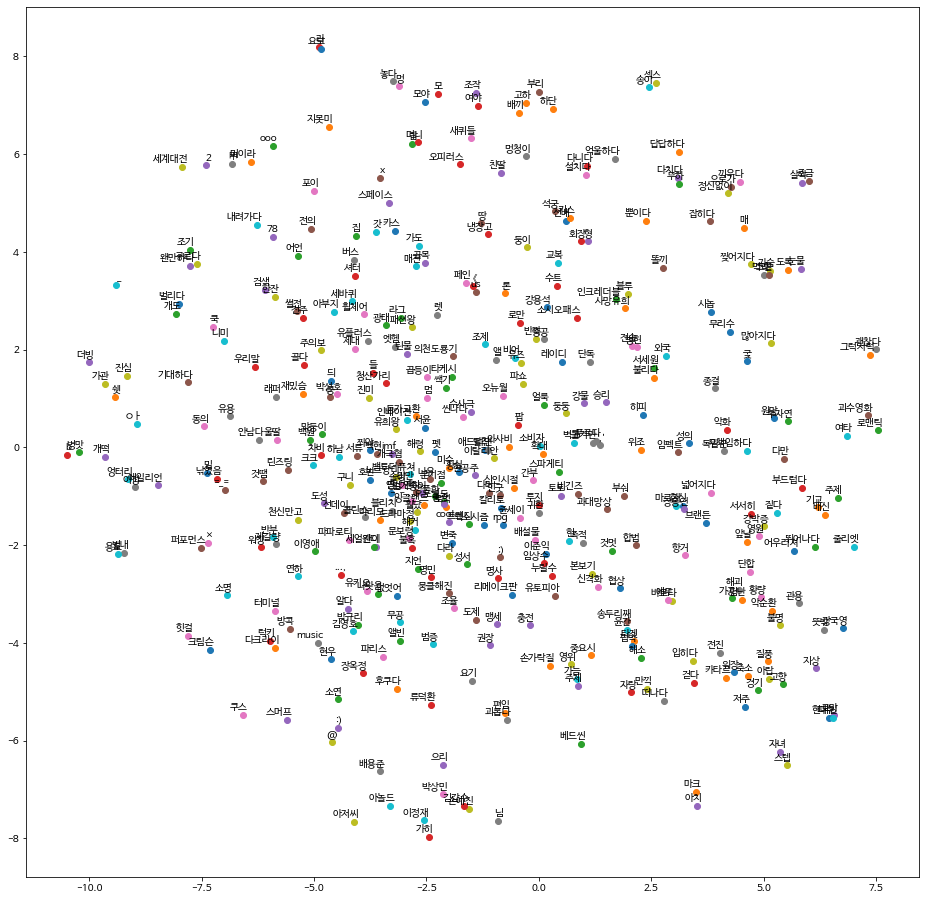

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

tsne = "fill here"(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 400

low_dim_embs = tsne.fit_transform(np.array([list(i[1]) for i in samples]))
labels = [i[0] for i in samples]
plot_with_labels(low_dim_embs, labels)

## **도전과제**

In [ ]:
def get_sim(target, count):

    pos_1 = dict(model.findSynonymsArray(target[0], count))
    pos_2 = dict(model.findSynonymsArray(target[1], count))
    neg = dict(model.findSynonymsArray(target[2], count))

    sim_ = []
    for i in pos_1:
        sim_.append((i,"fill here"[i]+(pos_2[i] if i in pos_2 else 0)-(neg[i] if i in neg else 0)))
    for i in pos_2:
        sim_.append((i,"fill here"[i]+(pos_1[i] if i in pos_1 else 0)-(neg[i] if i in neg else 0)))
    for i in neg:
        sim_.append((i,-"fill here"[i]+(pos_1[i] if i in pos_1 else 0)+(pos_2[i] if i in pos_2 else 0)))
    sim_ = sorted(sim_, key=lambda k : k[1], reverse=True)

    return sim_[:10]

In [ ]:
target = ["남자/noun", "여배우/noun", "배우/noun"]

get_sim(target, 20)

In [ ]:
target = ["주연/noun", "실력/noun", "캐스팅/noun"]

get_sim(target, 20)

In [ ]:
target = ["인간/noun", "국민/noun", "국가/noun"]

get_sim(target, 20)